# Synthetic Data Experiments (Visualizations)

In [1]:
include("src/Misc.jl")
using .Misc

In [13]:
import PyPlot, Seaborn
import Suppressor: @suppress_err

In [3]:
MARKER = ["o", "v", "d", "X", "p", "*", "P"];
PATH = "./results/synt";
IMG = "./img/synt";

## On Hyperparameters of BAM

\begin{equation}
X^{(1)} = \left(\begin{array}{cccc} 
    2 & 1 & 1 & 0 \\
    0 & 0 & 1 & 2 \\
    0 & 0 & 1 & 1 
    \end{array} \right)
\end{equation}

In [14]:
result = load_json("$PATH/effective_params.json")

R = Int.(result["R"])
As = Float64.(result["a"])
dₑₚ = Int.(result["EP"])
log_PS = hcat(result["log_PS"]...);
log_PX = logsumexp(log_PS,1);

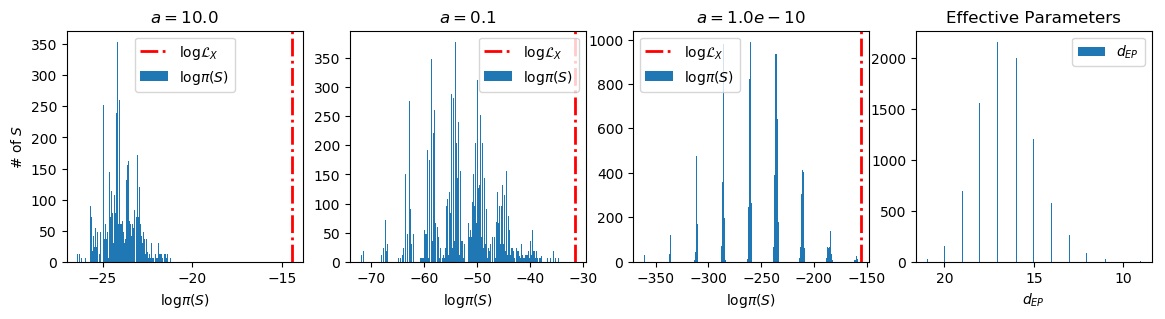

In [15]:
@suppress_err begin
fig, ax = PyPlot.subplots(1, 1+length(As); figsize=(14,3))

ax[1].set_ylabel("# of \$ S \$")
for (i,a) ∈ enumerate(As)
    ax[i].set_title("\$ a = $a \$")
    ax[i].hist(log_PS[:,i]; bins=200, label="\$ \\log \\pi(S) \$")
    ax[i].axvline(log_PX[i]; label="\$ \\log \\mathcal{L}_X \$", linestyle="-.", linewidth=2.0, color="red")
    ax[i].set_xlabel("\$ \\log \\pi(S) \$")
    ax[i].legend()
end

ax[end].set_title("Effective Parameters")
ax[end].hist(dₑₚ; bins=200, label="\$ d_{EP} \$")
ax[end].set_xlabel("\$ d_{EP}\$")
ax[end].invert_xaxis()
ax[end].legend()

PyPlot.savefig("$IMG/alloc_tensor_dist.pdf", bbox_inches="tight");
end

## Comparison of SMC, VB and exact enumeration on toy data

\begin{equation}
X^{(1)} = \left(\begin{array}{cccc} 
    2 & 1 & 1 & 0 \\
    0 & 0 & 1 & 2 \\
    0 & 0 & 1 & 1 
    \end{array} \right)
\end{equation}

In [16]:
result = load_json("$PATH/marginal_lkhd.json")

As = Float64.(result["a"])
Rs = Int.(result["R"])

log_PX = hcat(result["log_PX"]...)
log_PX_smc = hcat(result["log_PX_smc"]...)
log_PX_vb = hcat(result["log_PX_vb"]...);

In [17]:
log_PR = log_PX .- logsumexp(log_PX,dims=1);
log_PR_smc = log_PX_smc .- logsumexp(log_PX_smc,dims=1);
log_PR_vb = log_PX_vb .- logsumexp(log_PX_vb,dims=1);

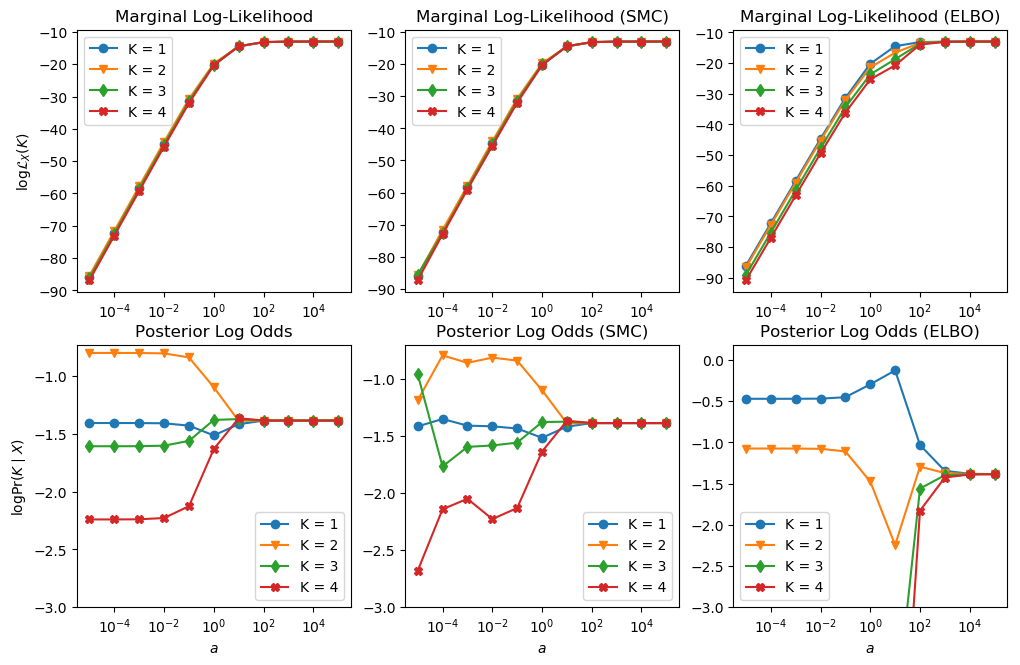

In [18]:
@suppress_err begin
fig, ax = PyPlot.subplots(2, 3; figsize=(12,7.5))

for (r,R) in enumerate(Rs)
    ax[1,1].semilogx(As,log_PX[r,:], label="K = $R", marker=MARKER[r])
    ax[2,1].semilogx(As,log_PR[r,:], label="K = $R", marker=MARKER[r])
    ax[1,2].semilogx(As,log_PX_smc[r,:], label="K = $R", marker=MARKER[r])
    ax[2,2].semilogx(As,log_PR_smc[r,:], label="K = $R", marker=MARKER[r])
    ax[1,3].semilogx(As,log_PX_vb[r,:], label="K = $R", marker=MARKER[r])
    ax[2,3].semilogx(As,log_PR_vb[r,:], label="K = $R", marker=MARKER[r])
end
ax[1,1].set_ylabel("\$ \\log \\mathcal{L}_X(K) \$");
ax[2,1].set_ylabel("\$ \\log \\mathrm{Pr}(K \\mid X) \$");
ax[1,1].set_title("Marginal Log-Likelihood");
ax[1,2].set_title("Marginal Log-Likelihood (SMC)");
ax[1,3].set_title("Marginal Log-Likelihood (ELBO)");
ax[2,1].set_title("Posterior Log Odds");
ax[2,2].set_title("Posterior Log Odds (SMC)");
ax[2,3].set_title("Posterior Log Odds (ELBO)");
    
foreach(i -> ax[2,i].set_xlabel("\$ a \$"), 1:3);
foreach(i -> ax[1,i].set_xlim(ax[1,1].get_xlim()), 1:3);
foreach(i -> ax[2,i].set_ylim(-3), 1:3);
for i ∈ 1:2, j ∈ 1:3; ax[i,j].legend() end

PyPlot.savefig("$IMG/marginal_lkhd.pdf", bbox_inches="tight");
end

\begin{equation}
X^{(2)} = \left(\begin{array}{ccc} 
    4 & 3 & 0 \\
    0 & 0 & 3 \\
    0 & 0 & 3 
    \end{array} \right)
\end{equation}

In [19]:
result = load_json("$PATH/marginal_lkhd2.json")

As = Float64.(result["a"])
Rs = Int.(result["R"])

log_PX = hcat(result["log_PX"]...)
log_PX_smc = hcat(result["log_PX_smc"]...)
log_PX_vb = hcat(result["log_PX_vb"]...);

In [20]:
log_PR = log_PX .- logsumexp(log_PX,dims=1);
log_PR_smc = log_PX_smc .- logsumexp(log_PX_smc,dims=1);
log_PR_vb = log_PX_vb .- logsumexp(log_PX_vb,dims=1);

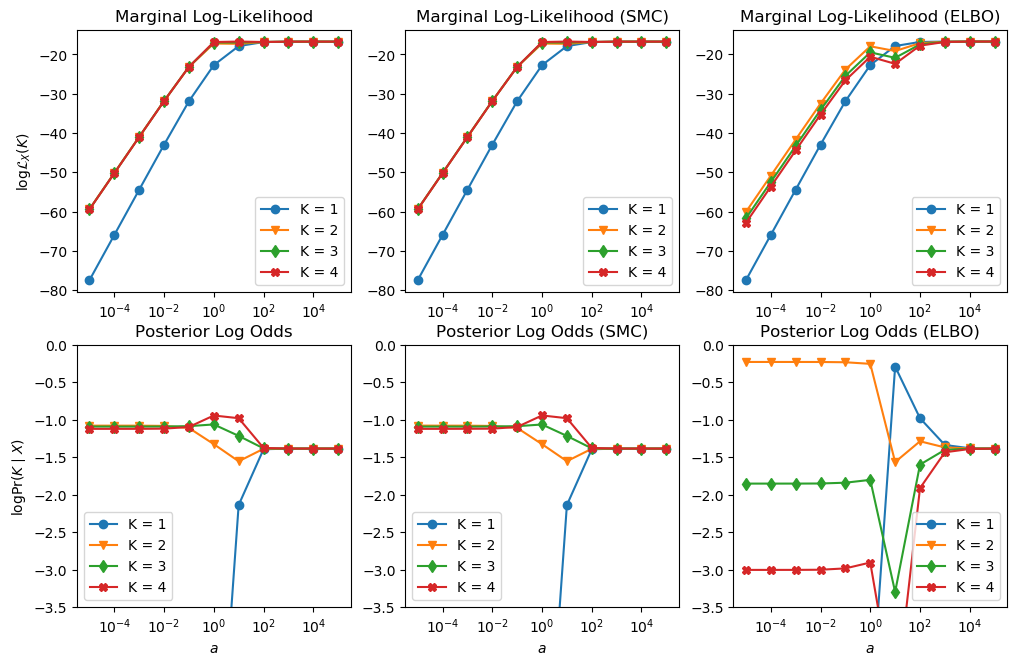

In [21]:
@suppress_err begin
fig, ax = PyPlot.subplots(2, 3; figsize=(12,7.5))

for (r,R) in enumerate(Rs)
    ax[1,1].semilogx(As,log_PX[r,:], label="K = $R", marker=MARKER[r])
    ax[2,1].semilogx(As,log_PR[r,:], label="K = $R", marker=MARKER[r])
    ax[1,2].semilogx(As,log_PX_smc[r,:], label="K = $R", marker=MARKER[r])
    ax[2,2].semilogx(As,log_PR_smc[r,:], label="K = $R", marker=MARKER[r])
    ax[1,3].semilogx(As,log_PX_vb[r,:], label="K = $R", marker=MARKER[r])
    ax[2,3].semilogx(As,log_PR_vb[r,:], label="K = $R", marker=MARKER[r])
end
ax[1,1].set_ylabel("\$ \\log \\mathcal{L}_X(K) \$");
ax[2,1].set_ylabel("\$ \\log \\mathrm{Pr}(K \\mid X) \$");
ax[1,1].set_title("Marginal Log-Likelihood");
ax[1,2].set_title("Marginal Log-Likelihood (SMC)");
ax[1,3].set_title("Marginal Log-Likelihood (ELBO)");
ax[2,1].set_title("Posterior Log Odds");
ax[2,2].set_title("Posterior Log Odds (SMC)");
ax[2,3].set_title("Posterior Log Odds (ELBO)");
    
foreach(i -> ax[2,i].set_xlabel("\$ a \$"), 1:3);
foreach(i -> ax[1,i].set_xlim(ax[1,1].get_xlim()), 1:3);
foreach(i -> ax[2,i].set_ylim(-3.5,0.0), 1:3);
for i ∈ 1:2, j ∈ 1:3; ax[i,j].legend() end

PyPlot.savefig("$IMG/marginal_lkhd2.pdf", bbox_inches="tight");
end

## Posterior Distribution of the number of tokens $S_+$

\begin{equation}
X^{(3)} = \left(\begin{array}{cc} 
    3 & ? \\
    3 & 3 \\ 
    \end{array} \right)
\end{equation}

In [22]:
result₁ = load_json("$PATH/Sp_dist.json")

Ts = Int.(result₁["T"])
Rs = Int.(result₁["R"])
log_PT = hcat(result₁["log_PT"]...);

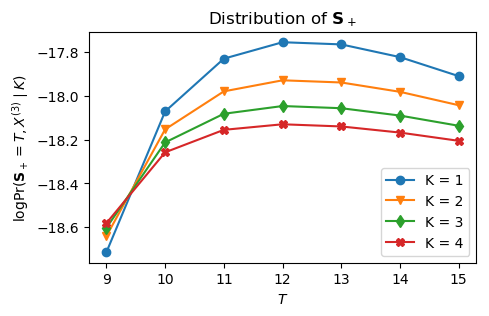

In [23]:
fig, ax = PyPlot.subplots(1, 1; figsize=(5,3))
for (r,R) in enumerate(Rs)
    ax.plot(Ts,log_PT[r,:], label="K = $R", marker=MARKER[r])
end
ax.set_title("Distribution of \$ \\mathbf{S}_+ \$");
ax.set_ylabel("\$ \\log \\mathrm{Pr}(\\mathbf{S}_+ = T,  X^{(3)} \\mid K) \$");
ax.set_xlabel("\$ T \$")
ax.legend();

PyPlot.savefig("$IMG/Sp_dist.pdf", bbox_inches="tight");

\begin{equation}
X^{(4)} = \left(\begin{array}{ccc} 
    4 & ? \\
    4 & 1
    \end{array} \right)
\end{equation}

In [24]:
result₂ = load_json("$PATH/Sp_dist2.json")

Ts = Int.(result₂["T"])
Rs = Int.(result₂["R"])
log_PT = hcat(result₂["log_PT"]...);

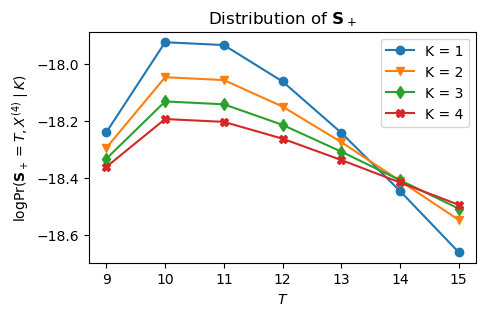

In [25]:
fig, ax = PyPlot.subplots(1, 1; figsize=(5,3))
for (r,R) in enumerate(Rs)
    ax.plot(Ts,log_PT[r,:], label="K = $R", marker=MARKER[r])
end
ax.set_title("Distribution of \$ \\mathbf{S}_+ \$");
ax.set_ylabel("\$ \\log \\mathrm{Pr}(\\mathbf{S}_+ = T,  X^{(4)} \\mid K) \$");
ax.set_xlabel("\$ T \$")
ax.legend();

PyPlot.savefig("$IMG/Sp_dist2.pdf", bbox_inches="tight");

## Model Order Selection for CP/PARAFAC

### Confusion Matrix

In [44]:
result = load_json("$PATH/parafac_confusion.json")

I, J, K, T = result["I"], result["J"], result["K"], result["T"]
Rs = Int.(result["R"])
As = Float64.(result["a"])

R_true = Int.(result["R_true"])
R_smc = Int.(result["R_smc"])
R_vb = Int.(result["R_vb"]);

In [29]:
conf_smc = zeros(Int,length(Rs),length(Rs));
conf_vb = zeros(Int,length(Rs),length(Rs));

In [30]:
for i ∈ 1:length(R_true)
    conf_smc[R_true[i],R_smc[i]] += 1
    conf_vb[R_true[i],R_vb[i]] += 1
end

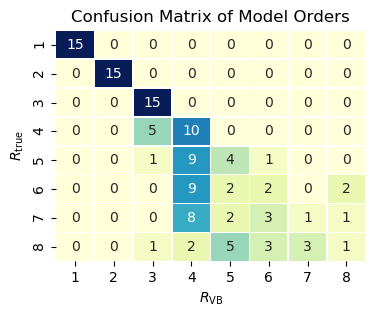

In [45]:
@suppress_err begin
fig, ax = PyPlot.subplots(1; figsize=(4,3))
Seaborn.heatmap(conf_vb; annot=true, cmap="YlGnBu", cbar=false, xticklabels=Rs, yticklabels=Rs, linewidths=.4, ax=ax)

ax.set_title("Confusion Matrix of Model Orders")
ax.set_ylabel("\$ R_\\mathrm{true} \$")
ax.set_xlabel("\$ R_\\mathrm{VB} \$")

PyPlot.savefig("$IMG/parafac_confusion_vb.pdf", bbox_inches="tight");
end

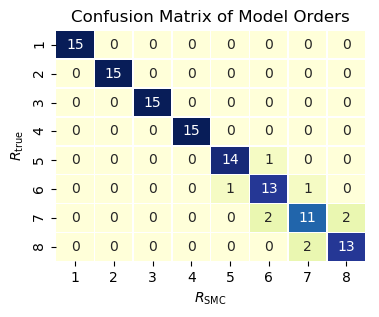

In [46]:
@suppress_err begin
fig, ax = PyPlot.subplots(1; figsize=(4,3))
Seaborn.heatmap(conf_smc; annot=true, cmap="YlGnBu", cbar=false, xticklabels=Rs, yticklabels=Rs, linewidths=.4, ax=ax)

ax.set_title("Confusion Matrix of Model Orders")
ax.set_ylabel("\$ R_\\mathrm{true} \$")
ax.set_xlabel("\$ R_\\mathrm{SMC} \$")

PyPlot.savefig("$IMG/parafac_confusion_smc.pdf", bbox_inches="tight");
end

### An Example

In [38]:
result = load_json("$PATH/parafac_model_selection.json")

I, J, K, R_true = result["I"], result["J"], result["K"], result["R_true"]
Rs = Int.(result["R"])
a = result["a"]
log_PX_smc, log_PX_vb = Float64.(result["log_PX_smc"]), Float64.(result["log_PX_vb"]);

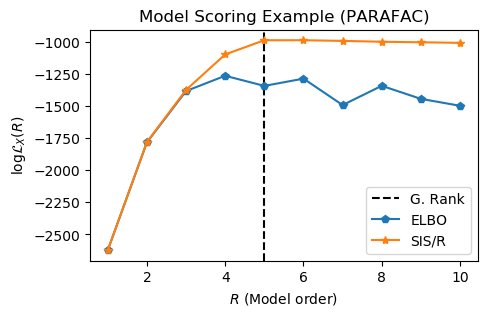

In [39]:
PyPlot.figure(figsize=(5,3))

PyPlot.axvline(R_true; label="G. Rank", color="black", linestyle="--")
PyPlot.plot(Rs, log_PX_vb; label="ELBO", marker=MARKER[5]);
PyPlot.plot(Rs, log_PX_smc; label="SIS/R", marker=MARKER[6]);

PyPlot.xlabel("\$R\$ (Model order)")
PyPlot.ylabel("\$ \\log \\mathcal{L}_X(R) \$")
PyPlot.title("Model Scoring Example (PARAFAC)");
PyPlot.legend();

PyPlot.savefig("$IMG/cp_model_selection.pdf", bbox_inches="tight");

### Runtimes

In [41]:
result = load_json("$PATH/parafac_runtime.json")

T, P, R, a = result["T"], result["P"], result["R"], result["a"]
IJK = Array{Array{Int,1},1}(result["IJK"])
smc_times = hcat(result["smc"]...)
vb_times = hcat(result["vb"]...);

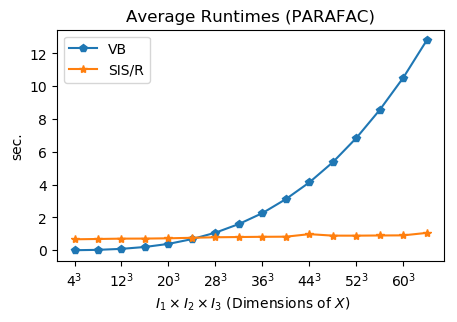

In [42]:
PyPlot.figure(figsize=(5,3))
PyPlot.plot(1:length(IJK),nanmean(vb_times,2); label="VB", marker=MARKER[5])
PyPlot.plot(1:length(IJK),nanmean(smc_times,2); label="SIS/R", marker=MARKER[6])
PyPlot.title("Average Runtimes (PARAFAC)")
PyPlot.ylabel("sec.")
PyPlot.xlabel(" \$ I_1 \\times I_2 \\times I_3 \$ (Dimensions of \$X\$)")
PyPlot.xticks(1:2:length(IJK),["\$ {$(4*i)}^3 \$" for i ∈ 1:2:length(IJK)])
PyPlot.legend()

PyPlot.savefig("$IMG/runtimes.pdf", bbox_inches="tight");